# Project 2

## Data Understanding

Each record (row) in this dataset represents a home in for King County, which includes Seattle.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file data/column_names.md in this repository for a full explanation of all variables in this dataset — 21 columns in total.

We are going to focus on the following features: **delete the ones we dont use from here!**

**price**: Sale price of the house in dollars

**id** - Unique identifier for a house

**date** - Date house was sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms

**sqft_living** - Square footage of living space in the home

**sqft_lot** - Square footage of the lot

**floors** - Number of floors (levels) in house

**waterfront** - Whether the house is on a waterfront 
    Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts 

**view** - Quality of view from house
    Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other

**condition** - How good the overall condition of the house is. Related to maintenance of house.
    See the King County Assessor Website for further explanation of each condition code 

**grade** - Overall grade of the house. Related to the construction and design of the house.
    See the King County Assessor Website for further explanation of each building grade code
    
**sqft_above** - Square footage of house apart from basement

**sqft_basement** - Square footage of the basement
    
**yr_built** - Year when house was built
    
**yr_renovated** - Year when house was renovated
    
**zipcode** - ZIP Code used by the United States Postal Service
    
**lat** - Latitude coordinate
    
**long** - Longitude coordinate

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Imports 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import statsmodels.api as sm
import folium

Import the data

In [2]:
df = pd.read_csv('./data/kc_house_data.csv', parse_dates = ['date'])

In [3]:
house = df.copy()

In [4]:
house.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

## Data Analysis

In [5]:
house.shape

(21597, 21)

In [6]:
house['date'].min(), house['date'].max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [7]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

## Data Cleaning and feature engineering

In [9]:
# Dropping the id and date column
house = house.drop(['id', 'date'], axis=1)

In [10]:
# splitting grade and keeping only 
house['grade'] = house['grade'].map(lambda x: x.split()[0])
house['grade'] = house['grade'].astype(int)

In [11]:
house['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [12]:
house['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [13]:
# what to do with the waterfront null values 
# accounts for ~10% of our data and ~99% of the remaining houses 
# don't have waterfront views. 
house['waterfront'].isnull().sum()

2376

In [14]:
# waterfront_nulldf= house[house['waterfront'].isnull()]
# waterfront_nulldf

In [15]:
house['waterfront'].fillna("NO", inplace = True)

In [16]:
house['waterfront'].replace(('NO', 'YES'), (0, 1), inplace=True)

In [17]:
house['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [18]:
# what to do with the house view null values
house['view'].isnull().sum()

63

In [19]:
house['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [20]:
# dropping 63 records with null view values
house = house.dropna(subset=['view'])

In [21]:
house['condition'].value_counts() # yay! looks good! 

Average      13981
Good          5657
Very Good     1697
Fair           170
Poor            29
Name: condition, dtype: int64

In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   waterfront     21534 non-null  int64  
 7   view           21534 non-null  object 
 8   condition      21534 non-null  object 
 9   grade          21534 non-null  int64  
 10  sqft_above     21534 non-null  int64  
 11  sqft_basement  21534 non-null  object 
 12  yr_built       21534 non-null  int64  
 13  yr_renovated   17704 non-null  float64
 14  zipcode        21534 non-null  int64  
 15  lat            21534 non-null  float64
 16  long           21534 non-null  float64
 17  sqft_living15  21534 non-null  int64  
 18  sqft_l

In [23]:
# yr renovated column does not have useful information with only 17704 non null values
# and 16961 of them have 0 vlaue. We drop the column.
house['yr_renovated'].value_counts()

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
# dropping yr renovated column 
house = house.drop(['yr_renovated'], axis=1)

In [25]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   waterfront     21534 non-null  int64  
 7   view           21534 non-null  object 
 8   condition      21534 non-null  object 
 9   grade          21534 non-null  int64  
 10  sqft_above     21534 non-null  int64  
 11  sqft_basement  21534 non-null  object 
 12  yr_built       21534 non-null  int64  
 13  zipcode        21534 non-null  int64  
 14  lat            21534 non-null  float64
 15  long           21534 non-null  float64
 16  sqft_living15  21534 non-null  int64  
 17  sqft_lot15     21534 non-null  int64  
dtypes: flo

In [26]:
house.info() #objects - View, condition and sqft_basement
# leave as string and change later using OHE - view, condition

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   waterfront     21534 non-null  int64  
 7   view           21534 non-null  object 
 8   condition      21534 non-null  object 
 9   grade          21534 non-null  int64  
 10  sqft_above     21534 non-null  int64  
 11  sqft_basement  21534 non-null  object 
 12  yr_built       21534 non-null  int64  
 13  zipcode        21534 non-null  int64  
 14  lat            21534 non-null  float64
 15  long           21534 non-null  float64
 16  sqft_living15  21534 non-null  int64  
 17  sqft_lot15     21534 non-null  int64  
dtypes: flo

In [27]:
house.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above sqft_basement  yr_built  zipcode  \
0  NONE    Average      7        1180           0.0      1955    98178   
1  NONE    Average      7        2170         400.0      1951    98125   
2  NONE    Average      6         770           0.0      1933    98028   
3  NONE  Very Good      7        1050         910.0      1965    98136   
4  NONE    Average      8        1680           0.0      1987    98074   

       lat     long  sqft_living15  sqft_lot15  
0  47.5112 -122.257           1340        5650  
1  47.7210 -122.319           1690        7639  
2  47.7379 -122.233           2720        8062  
3  47.5208 -122.393           1360        5000  
4  47.6168 -122.045           1800        7503

In [28]:
house.loc[house['sqft_basement'] == '?'] 
#what is '?' - 452 is a small portion of the data set, we can drop these entires
#sqft above is a more useful column

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
6       257500.0         3       2.25         1715      6819     2.0   
18      189000.0         2       1.00         1200      9850     1.0   
42      861990.0         5       2.75         3595      5639     2.0   
79      720000.0         4       2.50         3450     39683     2.0   
112     272500.0         3       1.75         1540     12600     1.0   
...          ...       ...        ...          ...       ...     ...   
21442   504600.0         5       3.00         2360      5000     1.0   
21447   337500.0         4       2.50         2330      4907     2.0   
21473   352500.0         2       2.50          980      1010     3.0   
21519   332000.0         4       2.50         2380      5737     2.0   
21581  1580000.0         4       3.25         3410     10125     2.0   

       waterfront  view condition  grade  sqft_above sqft_basement  yr_built  \
6               0  NONE   Average      7        1715             ?      1995   
18              0  NONE      Good      7        1200             ?      1921   
42              0  NONE   Average      9        3595             ?      2014   
79              0  NONE   Average     10        3450             ?      2002   
112             0  NONE      Good      7        1160             ?      1980   
...           ...   ...       ...    ...         ...           ...       ...   
21442           0  NONE   Average      7        1390             ?      2008   
21447           0  NONE   Average      7        2330             ?      2013   
21473           0  NONE   Average      8         980             ?      2008   
21519           0  NONE   Average      7        2380             ?      2010   
21581           0  NONE   Average     10        3410             ?      2007   

       zipcode      lat     long  sqft_living15  sqft_lot15  
6        98003  47.3097 -122.327           2238        6819  
18       98002  47.3089 -122.210           1060        5095  
42       98053  47.6848 -122.016           3625        5639  
79       98010  47.3420 -122.025           3350       39750  
112      98038  47.3624 -122.031           1540       11656  
...        ...      ...      ...            ...         ...  
21442    98103  47.6931 -122.330           2180        5009  
21447    98042  47.3590 -122.081           2300        3836  
21473    98117  47.6844 -122.387            980        1023  
21519    98023  47.2815 -122.356           2380        5396  
21581    98040  47.5653 -122.223           2290       10125  

[452 rows x 18 columns]

In [29]:
house = house.drop(['sqft_basement'], axis=1)


In [30]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   waterfront     21534 non-null  int64  
 7   view           21534 non-null  object 
 8   condition      21534 non-null  object 
 9   grade          21534 non-null  int64  
 10  sqft_above     21534 non-null  int64  
 11  yr_built       21534 non-null  int64  
 12  zipcode        21534 non-null  int64  
 13  lat            21534 non-null  float64
 14  long           21534 non-null  float64
 15  sqft_living15  21534 non-null  int64  
 16  sqft_lot15     21534 non-null  int64  
dtypes: float64(5), int64(10), object(2)
memory usage: 

# Interpret a Correlation Heatmap to Build a Baseline Model

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

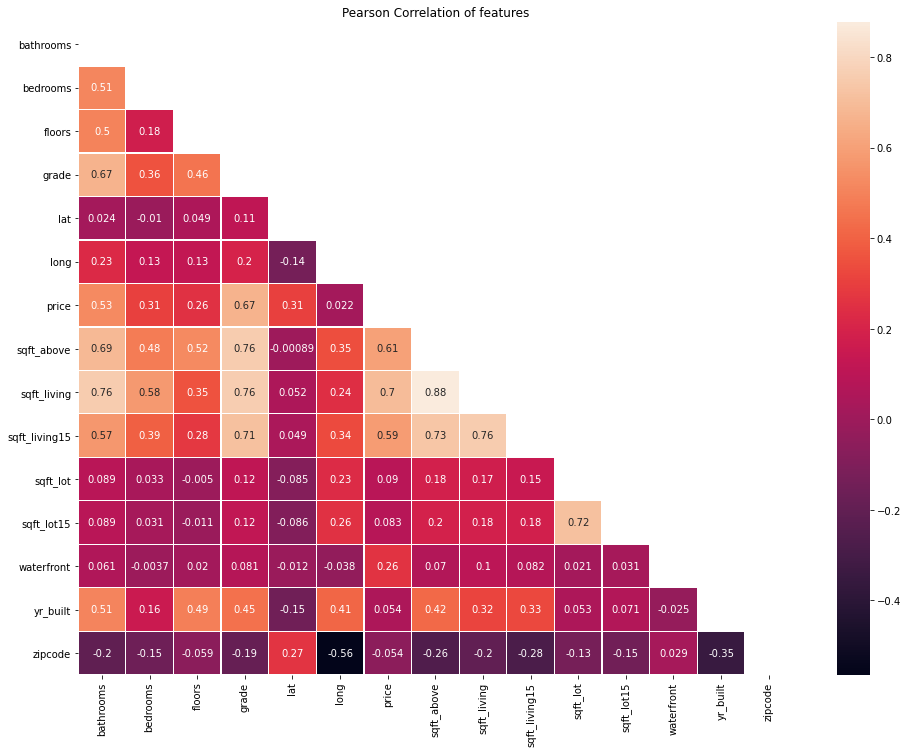

In [31]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in house.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = house.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = house[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25, annot=True, mask=np.triu(np.ones_like(num_list, dtype=bool)))


Based on the plot above, 'sqft_living' is most strongly positively correlated (with the greatest magnitude) with the target (price).

In [32]:
# assign price to the variable target_feature

target_feature = 'price'

In [33]:
# assign sqft_living to the variable most_correlated_feature to make a simple regression model.

most_correlated_feature = 'sqft_living'

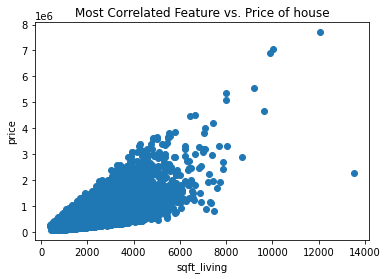

In [34]:
# plot a scatter plot to visulaize most correlated feature and target variable 
fig, ax = plt.subplots()

ax.scatter(x=house[most_correlated_feature], y=house[target_feature])
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel(target_feature)
ax.set_title("Most Correlated Feature vs. Price of house");

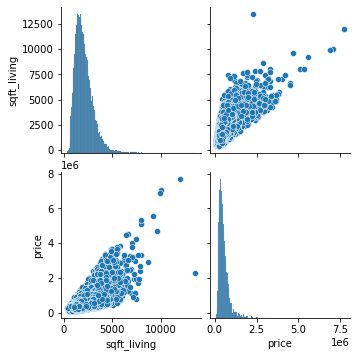

In [35]:
# see the distribution of the feature and target
slr_df = house[['sqft_living', 'price']]
sns.pairplot(slr_df);

We identified sqft_living as the most correlated feature, we have a scatter plot that shows a fairly clear linear relationship between that feature and the target.

However, linear regression works bbetter if the predictor and target are normally distributed.
Log-scaling can be a good tool to make right-skewed data more normal.

In [36]:
X = house['price']
y = house['sqft_living']
log_X = np.log(X)
log_y = np.log(y)

It looks like now we are ready to proceed with making our baseline model after the transformation.

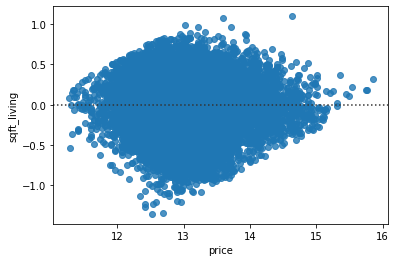

In [37]:
#residual plot to check for Heteroskedacity
sns.residplot(x=log_X, y=log_y);

In [38]:
endog = log_y
exog = sm.add_constant(log_X)
lin_reg_model = sm.OLS(endog, exog)
simple_model = lin_reg_model.fit().summary()

In [39]:
simple_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.798e+04
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:57:33   Log-Likelihood:                -5550.0
No. Observations:               21534   AIC:                         1.110e+04
Df Residuals:                   21532   BIC:                         1.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4569      0.053      8.631      0.000       0.353       0.561
price          0.5437      0.004    134.090      0.000       0.536       0.552
==============================================================================
Omnibus:                      445.370   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              473.181
Skew:                          -0.363   Prob(JB):                    1.78e-103
Kurtosis:                       3.032   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check airbnb data

In [40]:
abnb_df = pd.read_csv('data/listings (2).csv')

In [41]:
abnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4686 non-null   int64  
 1   name                            4686 non-null   object 
 2   host_id                         4686 non-null   int64  
 3   host_name                       4686 non-null   object 
 4   neighbourhood_group             4686 non-null   object 
 5   neighbourhood                   4686 non-null   object 
 6   latitude                        4686 non-null   float64
 7   longitude                       4686 non-null   float64
 8   room_type                       4686 non-null   object 
 9   price                           4686 non-null   int64  
 10  minimum_nights                  4686 non-null   int64  
 11  number_of_reviews               4686 non-null   int64  
 12  last_review                     39

In [42]:
abnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [43]:
abnb_cleaned = abnb_df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'], axis=1)

In [44]:
abnb_cleaned.head()

neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
0         Central Area         Madrona  47.61094 -122.29286  Entire home/apt   
1  Other neighborhoods     Wallingford  47.65444 -122.33629  Entire home/apt   
2  Other neighborhoods      Georgetown  47.55017 -122.31937     Private room   
3         West Seattle  Fairmount Park  47.55495 -122.38663  Entire home/apt   
4         West Seattle  Fairmount Park  47.55627 -122.38607  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  
0    333               7                 36               0.22  
1     99               3                157               1.04  
2     62               2                154               1.11  
3    185               2                 54               0.45  
4    145               5                 59               0.49

In [45]:
seattle_lat_max = abnb_cleaned['latitude'].max()
seattle_lat_min = abnb_cleaned['latitude'].min()
seattle_lon_max = abnb_cleaned['longitude'].max()
seattle_lon_min = abnb_cleaned['longitude'].min()

In [47]:
house_seattle = house.loc[((house['lat'] >= seattle_lat_min) & (house['lat'] <= seattle_lat_max)) & ((house['long'] >= seattle_lon_min) & (house['long'] <= seattle_lon_max))]
house_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7011 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          7011 non-null   float64
 1   bedrooms       7011 non-null   int64  
 2   bathrooms      7011 non-null   float64
 3   sqft_living    7011 non-null   int64  
 4   sqft_lot       7011 non-null   int64  
 5   floors         7011 non-null   float64
 6   waterfront     7011 non-null   int64  
 7   view           7011 non-null   object 
 8   condition      7011 non-null   object 
 9   grade          7011 non-null   int64  
 10  sqft_above     7011 non-null   int64  
 11  yr_built       7011 non-null   int64  
 12  zipcode        7011 non-null   int64  
 13  lat            7011 non-null   float64
 14  long           7011 non-null   float64
 15  sqft_living15  7011 non-null   int64  
 16  sqft_lot15     7011 non-null   int64  
dtypes: float64(5), int64(10), object(2)
memory usage: 9

In [48]:
# Keeping only necessary columns from the house_cleaned dataframe
house_seattle_locations = house_seattle[['lat', 'long', 'price']]

In [49]:
# Creating the map and adding points to it
map = folium.Map(location=[house_seattle_locations.lat.mean(), house_seattle_locations.long.mean()], zoom_start=8, control_scale=True)

for index, location_info in house_seattle_locations.iterrows():
    folium.Marker([location_info['lat'], location_info['long']], popup=location_info["price"]).add_to(map)

In [50]:
# Displaying map
map